In [ ]:
import cv2
import numpy as np
from PIL import Image
import dlib
import argparse
import imutils
import math
from matplotlib import pyplot as plt

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-06 08:39:35--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  41.2MB/s    in 1.5s    

2021-07-06 08:39:36 (41.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bunzip2 'shape_predictor_68_face_landmarks.dat.bz2'

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
def func1(rect):
  if len(rects) > 0:
    for rect in rects:
        x = rect.left()
        y = rect.top()
        w = rect.right() -x
        h = rect.bottom() -y
  return (x,y,w,h)

In [ ]:
def shape_to_normal(shape):
    shape_normal = np.zeros((68,2))
    for i in range(0, 68):
      shape_normal[i] = (shape.part(i).x, shape.part(i).y)
    return shape_normal

In [ ]:
def func3(shape_normal):
  dis = (np.sum(shape_normal[42:47,1]) - np.sum(shape_normal[36:41,1]))/(np.sum(shape_normal[42:47,0]) - np.sum(shape_normal[36:41,0])) 
  angle=math.degrees(math.atan(dis))
  return angle

In [ ]:
def rotate_image(image, shapex):
  angle=func3(shapex)
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [ ]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread("image3.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
rects = detector(gray, 1)
print(len(rects))

1


In [ ]:
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    (x, y, w, h) = func1(rect)
    print(i, x, y, w, h)

0 82 142 267 267


In [ ]:
shape = predictor(gray, rect)

In [ ]:
shape1 = shape_to_normal(shape)

In [ ]:
print(shape1.shape)

(68, 2)


In [ ]:
angle=func3(shape1)

In [ ]:
print(angle)

-12.78835646383159


In [ ]:
ans=rotate_image(gray, shape1)

In [ ]:
print(ans)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
ans.shape

(567, 500)

In [ ]:
def face_align(image):
  image = np.array(image)
  image = image.astype(np.uint8)
  gray = image
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#  print(gray)
  rects = detector(gray, 1)
#  print(len(rects))
  if len(rects) > 0:

    images = []
    for (i, rect) in enumerate(rects):
      shape = predictor(gray, rect)
      shape = shape_to_normal(shape)
      angle=func3(shape)
      rotated_image = rotate_image(gray , shape)
      images.append(rotated_image)
    #  print(rotated_image)
    if len(rects) == 1 :
      return rotated_image
    else:
      return images
  else:
    #print("Error : number of detected face is zero, so we just return original image")
    return image


In [ ]:
im=face_align(image)

[[ 85 119 132 ...  99 100  98]
 [ 88 120 133 ...  93  99  99]
 [ 84 117 131 ...  94 100  98]
 ...
 [ 82  33  34 ...  91  91  63]
 [ 71  17  21 ...  95  89  26]
 [ 83  29  31 ...  98  92  24]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


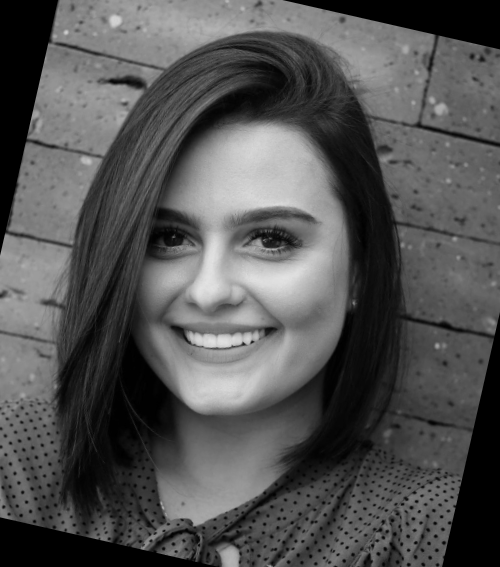

In [ ]:
cv2_imshow(im)

In [ ]:
shape2 = predictor(ans, rect)
shape22 = shape_to_normal(shape2)


In [ ]:
import skimage

In [ ]:
from skimage.io import imread, imshow
from skimage import draw

In [ ]:
outline = shape22[[*range(17), *range(26,16,-1)]]
Y, X = skimage.draw.polygon(outline[:,1], outline[:,0])

In [ ]:
cropped_img = np.zeros(ans.shape, dtype=np.uint8)
cropped_img[Y, X] = ans[Y, X]

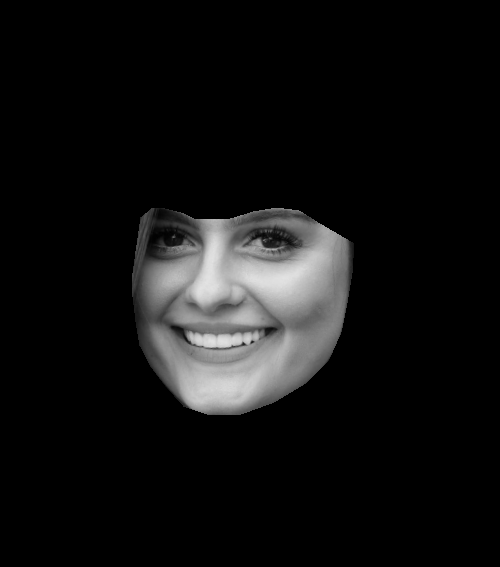

In [ ]:
cv2_imshow(cropped_img)

In [ ]:
def forehead_dist(shape_normal):

  d = (np.sum(shape_normal[42:47,1]) - np.sum(shape_normal[36:41,1]))/ 6
  return d

In [ ]:
def face_cropping_without_forehead(image):  

 
  rects = detector(image ,1)           
  if len(rects) > 0:
    images = []
    for (i, rect) in enumerate(rects):
	
      shape = predictor(image, rect)
      shape = shape_to_normal(shape)
   
      # [i.e., (x, y, w, h)], then draw the face bounding box
      #(x1, y1, w1, h1) = func1(rect)

      d =(np.sum(shape[42:47,1]) - np.sum(shape[36:41,1]))/ 6
      top_y = int(np.sum(shape[42 : 47, 1]) / 6 - 0.6 * d)
      left_x, left_y = shape[0]
      bottom_x, bottom_y = shape[8]
      right_x, right_y = shape[16]
      cropped_image = image[int(top_y) : int(bottom_y), int(left_x) : int(right_x)]
     # print(image.shape[1])
     # print(shape.shape)
      if cropped_image.shape[0] == 0: 
        cropped_image = image[0:-1,int(left_x) : int(right_x)] 
      if cropped_image.shape[1] == 0:
        cropped_image = image[int(top_y) : int(bottom_y),  0:-1]
      images.append(cropped_image)
    if len(rects) == 1 :
      return cropped_image
    else:
      return images

  
  else:
    #print("Error : number of detected face is zero, so we just return original image")
    return image

In [ ]:
ans2=face_cropping_without_forehead(ans)

500
(68, 2)


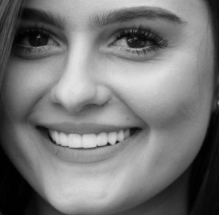

In [ ]:
cv2_imshow(ans2)

In [ ]:
def face_cropping_without_background(image):         # implementing face cropping without background
  #gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  # convert color image to grayscale image
  rects = detector(image ,1)             # detect faces in the grayscale image
  if len(rects) > 0:
    images = []
    for (i, rect) in enumerate(rects):
	
      shape = predictor(image, rect)
      shape = shape_to_normal(shape)
    
      # convert dlib's rectangle to a OpenCV-style bounding box
      # [i.e., (x, y, w, h)], then draw the face bounding box
      (x1, y1, w1, h1) = func1(rect)

      top_x, top_y = shape[19]
      left_x, left_y = shape[0]
      bottom_x, bottom_y = shape[8]
      right_x, right_y = shape[16]
      cropped_image = image[ min(int(top_y), abs(y1)) : max(int(bottom_y), abs(y1) + w1), min(int(left_x), abs(x1)) : max(int(right_x), abs(x1) + w1)]
      if cropped_image.shape[0] == 0: 
        cropped_image = image[:,min(left_x, abs(x1)) : max(right_x, abs(x1) + w1)] 
      if cropped_image.shape[1] == 0:
        cropped_image = image[min(top_y, abs(y1)) : max(bottom_y, abs(y1) + w1), :]
      images.append(cropped_image)
    if len(rects) == 1 :
      return cropped_image
    else:
      return images
  else:
    print("Error : number of detected face is zero, so we just return original image")
    return image

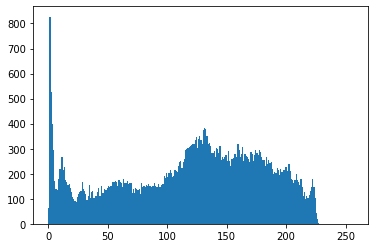

In [ ]:
plt.hist(ans2.ravel(),256,[0,256]); plt.show()

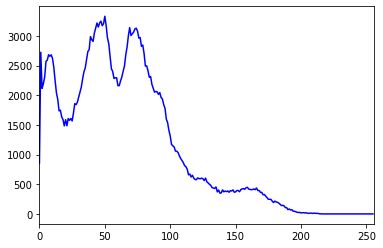

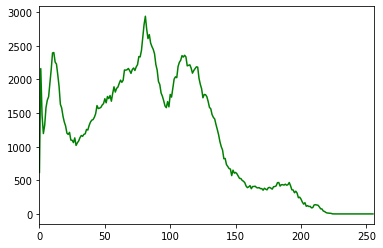

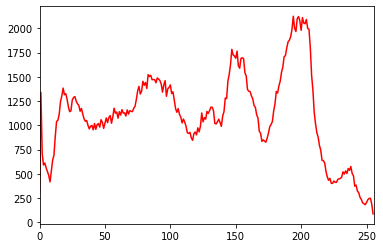

In [ ]:
color = ('b','g','r')
 # When you want to traverse an index and traverse an element for a list or array
 # Using the built-in enumerrate function will have a more direct and beautiful approach
 #enumerate will make an array or list into an index sequence.
 # Make it easier for us to get the index and index content again
for i,col in enumerate(color):
 histr = cv2.calcHist([image],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])
 plt.show()

In [ ]:

 #flatten() Turn an array into a dimension
hist,bins = np.histogram(image.flatten(),256,[0,256])
 # Calculate the cumulative distribution map
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

AttributeError: ignored

In [ ]:
def histogram_equilization(image):
  hist,bins = np.histogram(image.flatten(),256,[0,256])
 # Calculate the cumulative distribution map
  cdf = hist.cumsum()
  cdf_normalized = cdf * hist.max()/ cdf.max()
  cdf_m = np.ma.masked_equal(cdf,0)
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
 # Assign a value to the masked element, where the assignment is 0
  cdf = np.ma.filled(cdf_m,0).astype('uint8')
  image= cdf[image]
  return image

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
 # Assign a value to the masked element, where the assignment is 0
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[ans2]


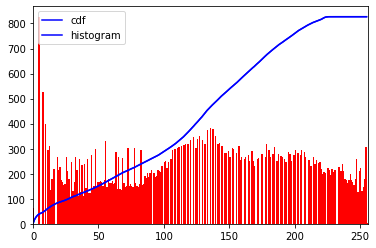

In [ ]:

 # Calculate the cumulative distribution map
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

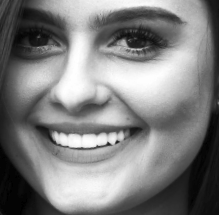

In [ ]:
cv2_imshow(img2)

In [ ]:
from google.colab import drive    # for importing dataset from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/archive.zip"

Archive:  /content/drive/My Drive/archive.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/ange

In [ ]:
SOURCE = '/content/drive/MyDrive/dataset/CK+48/'

In [ ]:
!unzip -u "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/dataset"

Archive:  /content/drive/My Drive/archive.zip


In [ ]:
import os 
source=os.listdir(SOURCE)

print(len(source))

2


In [ ]:
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import stats

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('file is zero length, so ignoring')
    
    n_files = len(all_files)
    training_len = int(n_files * SPLIT_SIZE)
    testing_len = int(len(all_files) - training_len)
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[0:training_len]
    test_set = shuffled[:testing_len]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)


In [ ]:
split_size=0.8
anger_train_dir = '/content/drive/MyDrive/traindataset/anger/'
sadness_train_dir = '/content/drive/MyDrive/traindataset/sadness/'
disgust_train_dir = '/content/drive/MyDrive/traindataset/disgust/'
happy_train_dir = '/content/drive/MyDrive/traindataset/happy/'
fear_train_dir = '/content/drive/MyDrive/traindataset/fear/'
contempt_train_dir = '/content/drive/MyDrive/traindataset/contempt/'
surprise_train_dir = '/content/drive/MyDrive/traindataset/surprise/'

anger_test_dir = '/content/drive/MyDrive/testdataset/anger/'
sadness_test_dir = '/content/drive/MyDrive/testdataset/sadness/'
disgust_test_dir = '/content/drive/MyDrive/testdataset/disgust/'
happy_test_dir = '/content/drive/MyDrive/testdataset/happy/'
fear_test_dir = '/content/drive/MyDrive/testdataset/fear/'
contempt_test_dir = '/content/drive/MyDrive/testdataset/contempt/'
surprise_test_dir = '/content/drive/MyDrive/testdataset/surprise/'

anger_source_dir = '/content/drive/My Drive/dataset/CK+48/anger/'
sadness_source_dir = '/content/drive/My Drive/dataset/CK+48/sadness/'
disgust_source_dir = '/content/drive/My Drive/dataset/CK+48/disgust/'
happy_source_dir = '/content/drive/My Drive/dataset/CK+48/happy/'
fear_source_dir = '/content/drive/My Drive/dataset/CK+48/fear/'
contempt_source_dir = '/content/drive/My Drive/dataset/CK+48/contempt/'
surprise_source_dir = '/content/drive/My Drive/dataset/CK+48/surprise/'

In [ ]:
split_data(anger_source_dir,anger_train_dir,anger_test_dir,split_size)
split_data(sadness_source_dir,sadness_train_dir,sadness_test_dir,split_size)
split_data(disgust_source_dir,disgust_train_dir,disgust_test_dir,split_size)
split_data(happy_source_dir,happy_train_dir,happy_test_dir,split_size)
split_data(fear_source_dir,fear_train_dir,fear_test_dir,split_size)
split_data(contempt_source_dir,contempt_train_dir,contempt_test_dir,split_size)
split_data(surprise_source_dir,surprise_train_dir,surprise_test_dir,split_size)

In [ ]:
def func1_no_neuron(classes):
   model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),
   tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(classes,activation='softmax')
                                   
  ])
   return model

In [ ]:
def func1_256_neuron(classes):
   model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),
   tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(256, activation = 'relu', name = "full_connected_1"),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(classes,activation='softmax')
                                   
  ])
   return model

In [ ]:
def func1_512_neuron(classes):
   model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),
   tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation = 'relu', name = "full_connected_1"),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(classes,activation='softmax')
                                   
  ])
   return model

In [ ]:
def func1_1024_neuron(classes):
   model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(100,100,1)),
   tf.keras.layers.MaxPooling2D((2,2)),
   tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
   tf.keras.layers.MaxPooling2D((2,2)),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1024, activation = 'relu', name = "full_connected_1"),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(classes,activation='softmax')
                                   
  ])
   return model

In [ ]:
model= func1_256_neuron(7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model1= func1_no_neuron(7)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2= func1_512_neuron(7)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3= func1_1024_neuron(7)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/traindataset"
train_datagen = ImageDataGenerator(rescale=int(1/255),
      horizontal_flip=True,
      rotation_range=2,   
                         
      preprocessing_function=ppreprocessing
      )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    target_size=(100,100),
                                                    shuffle=True,
                                                    
                                                    color_mode='grayscale')

VALIDATION_DIR = "/content/drive/MyDrive/testdataset"
validation_datagen = ImageDataGenerator(
    rescale=int(1/255),
      horizontal_flip=True,
      rotation_range=2,
      
      preprocessing_function=ppreprocessing
      )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                             
                                                              class_mode='categorical',
                                                              target_size=(100,100),
                                                              shuffle=True,
                                                    color_mode='grayscale')

Found 807 images belonging to 7 classes.
Found 219 images belonging to 7 classes.


In [ ]:
history3 = model3.fit(train_generator,epochs=10,batch_size=50,shuffle=True,validation_data=validation_generator)

Epoch 1/10
17/17 [==============================] - 19s 1s/step - loss: 128.3073 - accuracy: 0.3779 - val_loss: 0.9623 - val_accuracy: 0.6804
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.8219 - accuracy: 0.7261 - val_loss: 0.5712 - val_accuracy: 0.8219
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.6064 - accuracy: 0.8042 - val_loss: 0.3337 - val_accuracy: 0.9041
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.4197 - accuracy: 0.8575 - val_loss: 0.2439 - val_accuracy: 0.9269
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.3719 - accuracy: 0.8786 - val_loss: 0.1228 - val_accuracy: 0.9498
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.2426 - accuracy: 0.9145 - val_loss: 0.1530 - val_accuracy: 0.9406
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.2171 - accuracy: 0.9219 - val_loss: 0.1292 - val_accuracy: 0.9589
Epoch 8/10
17/17 [

In [ ]:
history2 = model2.fit(train_generator,epochs=10,batch_size=50,shuffle=True,validation_data=validation_generator)

Epoch 1/10
17/17 [==============================] - 20s 1s/step - loss: 99.7122 - accuracy: 0.4597 - val_loss: 0.5281 - val_accuracy: 0.7991
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.6149 - accuracy: 0.7943 - val_loss: 0.4009 - val_accuracy: 0.8402
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.4458 - accuracy: 0.8686 - val_loss: 0.2734 - val_accuracy: 0.9224
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.3311 - accuracy: 0.8934 - val_loss: 0.1161 - val_accuracy: 0.9498
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.2494 - accuracy: 0.9207 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.2363 - accuracy: 0.9145 - val_loss: 0.0727 - val_accuracy: 0.9772
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.1591 - accuracy: 0.9616 - val_loss: 0.0647 - val_accuracy: 0.9772
Epoch 8/10
17/17 [=

In [ ]:
history1 = model1.fit(train_generator,epochs=10,batch_size=50,shuffle=True,validation_data=validation_generator)

Epoch 1/10
17/17 [==============================] - 19s 1s/step - loss: 1.7541 - accuracy: 0.3222 - val_loss: 1.2214 - val_accuracy: 0.5479
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 1.2411 - accuracy: 0.5774 - val_loss: 0.9253 - val_accuracy: 0.7397
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.8387 - accuracy: 0.7224 - val_loss: 0.4109 - val_accuracy: 0.8402
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.7292 - accuracy: 0.7460 - val_loss: 0.3973 - val_accuracy: 0.8767
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.5532 - accuracy: 0.8079 - val_loss: 0.2625 - val_accuracy: 0.9224
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.6308 - accuracy: 0.7931 - val_loss: 0.4737 - val_accuracy: 0.8721
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.6434 - accuracy: 0.7869 - val_loss: 0.3243 - val_accuracy: 0.8813
Epoch 8/10
17/17 [==

In [ ]:
history = model.fit(train_generator,epochs=10,batch_size=50,shuffle=True,validation_data=validation_generator)

Epoch 1/10
17/17 [==============================] - 155s 9s/step - loss: 45.4376 - accuracy: 0.4114 - val_loss: 0.6176 - val_accuracy: 0.7717
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 0.6672 - accuracy: 0.7670 - val_loss: 0.2997 - val_accuracy: 0.9132
Epoch 3/10
17/17 [==============================] - 18s 1s/step - loss: 0.4646 - accuracy: 0.8451 - val_loss: 0.1906 - val_accuracy: 0.9361
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 0.2903 - accuracy: 0.8910 - val_loss: 0.1796 - val_accuracy: 0.9635
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.1964 - accuracy: 0.9393 - val_loss: 0.0588 - val_accuracy: 0.9817
Epoch 6/10
17/17 [==============================] - 18s 1s/step - loss: 0.1777 - accuracy: 0.9418 - val_loss: 0.0403 - val_accuracy: 0.9863
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.1490 - accuracy: 0.9579 - val_loss: 0.0329 - val_accuracy: 0.9909
Epoch 8/10
17/17 [

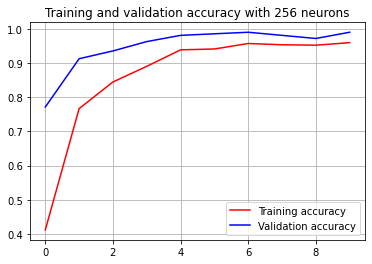

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with 256 neurons')
plt.legend(loc=0)
plt.grid()
plt.show()

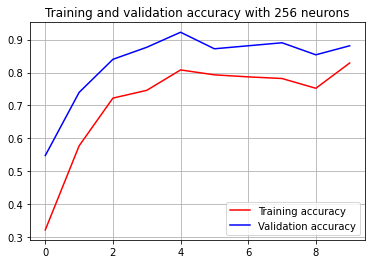

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with 256 neurons')
plt.legend(loc=0)
plt.grid()
plt.show()

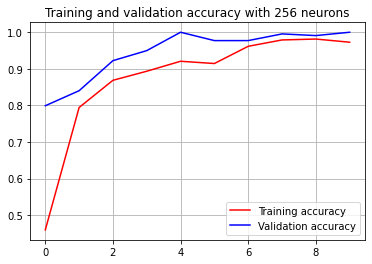

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with 256 neurons')
plt.legend(loc=0)
plt.grid()
plt.show()

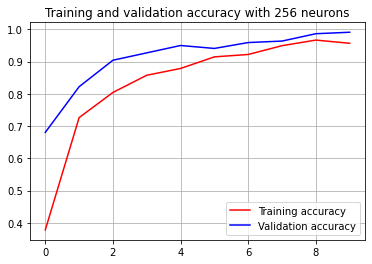

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with 256 neurons')
plt.legend(loc=0)
plt.grid()
plt.show()

['fear', 'contempt', 'disgust', 'surprise', 'happy', 'anger', 'sadness']


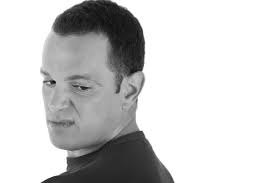

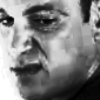

anger
[[9.20e-01 8.89e-36 1.71e-05 4.04e-07 0.00e+00 8.04e-02 0.00e+00]]


In [ ]:
print(emotion)
image = cv2.imread('image33.jpg',0)
cv2_imshow(image)
image = ppreprocessing(image)
image = np.array(image)
cv2_imshow(image)
image = image.reshape(1,100,100,1)
print(source[np.argmax(model.predict(image))])
#print(model.predict(image))

In [ ]:
from scipy import stats

In [ ]:
def ppreprocessing(images):  
 # A function for overall preprocessing including alignment ,cropping and normalization
  images = face_align(images)
  #cv2_imshow(images)
  images = face_cropping_without_forehead(images)
  #print('hey')
  #cv2_imshow(images)
#  print(images.shape)
  images = histogram_equilization(images)
  #cv2_imshow(images)
 # print(images)
  #print('hey')
  
 # normalized_img = stats.zscore(images)
  #images = normalized_img*255
  #images = cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
  images = cv2.resize(images,(100,100))
  images = np.array(images)
  try:
    images = images.reshape(100,100,1)
  except:
    return images
  return images


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix,classification_report

['fear', 'contempt', 'disgust', 'surprise', 'happy', 'anger', 'sadness']
219
Confusion matrix, without normalization
7.5


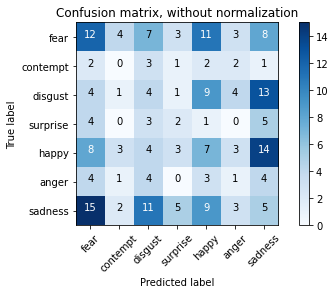

In [ ]:
emotion = os.listdir('/content/drive/MyDrive/traindataset')
print(emotion)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(7)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    thresh = cm.max() / 2.
    print(thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#y_pred=model.predict(validation_generator)
print(len(validation_generator.classes))
predictions = model.predict(validation_generator)
predictions1 = model1.predict(validation_generator)
predictions2 = model2.predict(validation_generator)
predictions3 = model3.predict(validation_generator)

y_pred = np.argmax(predictions, axis=1)
y_pred1 = np.argmax(predictions1, axis=1)
y_pred2 = np.argmax(predictions2, axis=1)
y_pred3 = np.argmax(predictions3, axis=1)
#print(y_pred)

#confusion matrix
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
np.set_printoptions(precision=2)
cnf_matrix1 = confusion_matrix(validation_generator.classes, y_pred1)
np.set_printoptions(precision=2)
cnf_matrix2 = confusion_matrix(validation_generator.classes, y_pred2)
np.set_printoptions(precision=2)
cnf_matrix3 = confusion_matrix(validation_generator.classes, y_pred3)
np.set_printoptions(precision=2)

#non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=emotion,
                      title='Confusion matrix, without normalization')

plt.show()

Confusion matrix, without normalization
6.0


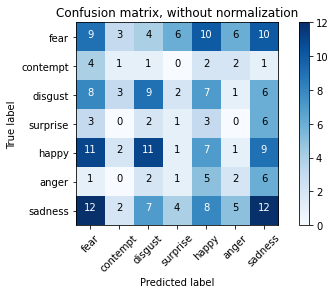

In [ ]:
#model1
plot_confusion_matrix(cnf_matrix2, classes=emotion,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
7.0


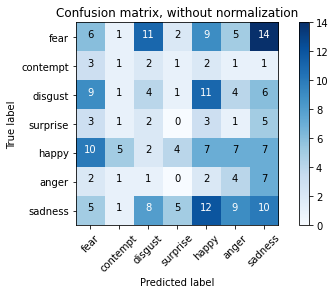

In [ ]:
#model2
plot_confusion_matrix(cnf_matrix1, classes=emotion,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
7.0


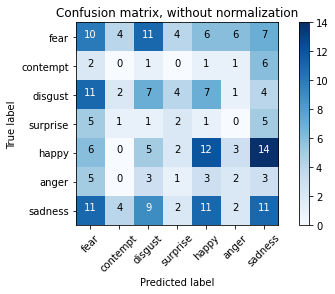

In [ ]:
#mdel3
plot_confusion_matrix(cnf_matrix3, classes=emotion,
                      title='Confusion matrix, without normalization')

In [ ]:
import os
#os.makedirs('/content/drive/My Drive/kfold')
for i in range(0,10):
  os.makedirs('/content/drive/My Drive/kfold/'+str(i))
  os.makedirs('/content/drive/My Drive/kfold/'+str(i)+'/train')
  os.makedirs('/content/drive/My Drive/kfold/'+str(i)+'/test')
  for j in os.listdir('/content/drive/My Drive/dataset/CK+48'):
    os.makedirs('/content/drive/My Drive/kfold/'+str(i)+'/train/'+j)
    os.makedirs('/content/drive/My Drive/kfold/'+str(i)+'/test/'+j)

In [ ]:
for i in range(0,10):
  totalfold='/content/drive/My Drive/kfold/'+str(i)
  testfold = '/content/drive/My Drive/kfold/' + str(i) + '/test'
  trainfold = '/content/drive/My Drive/kfold/' + str(i) + '/train'
  for j in os.listdir(trainfold):
    emotion_train_fold = trainfold + '/' + j
    emotion_test_fold = testfold + '/' + j
    emotion_source = '/content/drive/My Drive/dataset/CK+48/' + j
    length = len(os.listdir(emotion_source))
    initial_size = int(i*length/10)
    final_size = int((i+1)*length/10)
    files = []
    for k in os.listdir(emotion_source):
      path = emotion_source + '/' + k 
      files.append(k)
    testing_set = files[initial_size:final_size]
    training_set = []
    for n in files:
      if n not in testing_set:
        training_set.append(n)
    for filename in training_set:
      src = emotion_source + '/' + filename
      des = emotion_train_fold + '/' + filename
      copyfile(src,des)
    for filename in testing_set:
      src = emotion_source + '/' + filename
      des = emotion_test_fold + '/' + filename
      copyfile(src,des)

In [ ]:
tot_accuracy=0
for i in range(0,10):
  fold_path = '/content/drive/My Drive/kfold/' + str(i)
  TRAINING_DIR = train_fold = '/content/drive/My Drive/kfold/' + str(i) + '/train'
  train_datagen = ImageDataGenerator(rescale=1./255,
      horizontal_flip=True,
      rotation_range=2,                          
      preprocessing_function=ppreprocessing
      )
  train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    target_size=(100,100),
                                                    shuffle=True,
                                                    color_mode='grayscale')

  VALIDATION_DIR = '/content/drive/My Drive/kfold/' + str(i) + '/test'
  validation_datagen = ImageDataGenerator(
    rescale=1./255,
      horizontal_flip=True,
      rotation_range=2,
      preprocessing_function=ppreprocessing
      )
  validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                              class_mode='categorical',
                                                              target_size=(100,100),
                                                              shuffle=True,
                                                    color_mode='grayscale')
  validation_generator.shuffle = False
  validation_generator.index_array = None
  model = func1_256_neuron(7)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
  history = model.fit(train_generator,epochs=10,batch_size=50,shuffle=True)
  test_loss,test_acc=model.evaluate(validation_generator)
  tot_accuracy=tot_accuracy+test_acc
avg_acc=tot_accuracy/10
print(avg_acc)

Found 887 images belonging to 7 classes.
Found 94 images belonging to 7 classes.
Epoch 1/10
18/18 [==============================] - 20s 1s/step - loss: 2.2914 - accuracy: 0.3439
Epoch 2/10
18/18 [==============================] - 20s 1s/step - loss: 1.0609 - accuracy: 0.6460
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.6101 - accuracy: 0.7937
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.4276 - accuracy: 0.8602
Epoch 5/10
18/18 [==============================] - 20s 1s/step - loss: 0.2978 - accuracy: 0.9030
Epoch 6/10
18/18 [==============================] - 21s 1s/step - loss: 0.2216 - accuracy: 0.9267
Epoch 7/10
18/18 [==============================] - 21s 1s/step - loss: 0.1779 - accuracy: 0.9436
Epoch 8/10
18/18 [==============================] - 20s 1s/step - loss: 0.1438 - accuracy: 0.9493
Epoch 9/10
18/18 [==============================] - 19s 1s/step - loss: 0.1190 - accuracy: 0.9572
Epoch 10/10
2/2 [====================